# El Ruido ($\mathbf{R_t}$) y los Residuos en Series de Tiempo 🌫️

---

## **# 1. El Componente Residual ($R_t$): La Parte Inexplicable**

Una vez que hemos identificado y eliminado la **Tendencia** ($T_t$) y la **Estacionalidad** ($S_t$), lo que queda en la serie de tiempo se conoce como el **Componente Residual** o **Ruido** ($\mathbf{R_t}$).

El componente residual es la variación en la serie que **no puede ser explicada** por los patrones sistemáticos (tendencia y estacionalidad). Es, en esencia, el error o la aleatoriedad de la serie.

### **Fórmula de Descomposición (Recordatorio)**

En un modelo aditivo, el residuo es simplemente lo que queda tras restar los componentes explicados:

$$
R_t = Y_t - T_t - S_t
$$

* $Y_t$: El valor de la serie observado en el tiempo $t$.
* $T_t$: El valor de la Tendencia.
* $S_t$: El valor de la Estacionalidad.
* $\mathbf{R_t}$: El **Residuo** (el error del modelo de descomposición).

---

## **# 2. El Ruido Blanco (White Noise): La Meta del Modelado**

Para un científico de datos, el objetivo final de cualquier modelo de series de tiempo (ARIMA, Redes Neuronales, etc.) es transformar la serie original ($Y_t$) en un conjunto de **Residuos** que se parezcan al **Ruido Blanco** (*White Noise*).

El **Ruido Blanco** es una serie de tiempo puramente aleatoria que posee tres propiedades estadísticas cruciales.

### **Propiedades del Ruido Blanco**

| Propiedad | Descripción | Implicación para el Modelo |
| :--- | :--- | :--- |
| **Media Cero** | La esperanza matemática es cero: $E[R_t] = 0$. | Los errores son simétricos, sin sesgo positivo o negativo. |
| **Varianza Constante (Homoscedasticidad)** | La varianza de los errores es finita y constante: $\text{Var}[R_t] = \sigma^2$. | La incertidumbre no aumenta ni disminuye con el tiempo. |
| **No Autocorrelación** | Las observaciones de los residuos son independientes: $\text{Cov}[R_t, R_{t-k}] = 0$ para todo $k \ne 0$. | No hay patrones de información que el modelo haya omitido. |

**Importancia:** Si los residuos de tu modelo son Ruido Blanco, significa que **has capturado toda la información predecible** (Tendencia y Estacionalidad) y que lo que queda es pura aleatoriedad, que por definición, no se puede pronosticar.

---

## **# 3. Diagnóstico de Residuos en Python**

Una de las tareas más críticas de un científico de datos es verificar si los residuos de su modelo cumplen con las condiciones de Ruido Blanco.

Usaremos el proceso de descomposición para obtener los residuos y luego aplicaremos pruebas.

### **Paso A: Extracción de Residuos**

Usaremos la descomposición (como en los *notebooks* anteriores) para extraer el componente residual ($R_t$).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- 1. DATOS DE EJEMPLO (Serie con T, S, y R - Aumentamos a 60 puntos para pruebas robustas) ---
fechas = pd.date_range('2023-01-01', periods=60, freq='M') 
# Serie con Tendencia (100 + 2*i) y Ruido (normal)
valores = [100 + i * 2 + np.random.normal(0, 10) for i in range(len(fechas))]
serie_tiempo = pd.Series(valores, index=fechas)
# -----------------------------------------------------------------------------

# Descomposición (asumiendo modelo aditivo y periodo 1)
resultado = seasonal_decompose(serie_tiempo, model='additive', period=1) 
residuos = resultado.resid.dropna()

print(f"Residuos (R_t) extraídos. Tamaño: {len(residuos)}")
print(f"Media: {residuos.mean():.4f}, Varianza: {residuos.var():.4f}")

Residuos (R_t) extraídos. Tamaño: 60
Media: 0.0000, Varianza: 0.0000


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_8772\1914580917.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range('2023-01-01', periods=60, freq='M')


## Paso B: Verificación Visual (La Trama de los Residuos)

Graficar los residuos permite verificar rápidamente la media cero y la varianza constante.

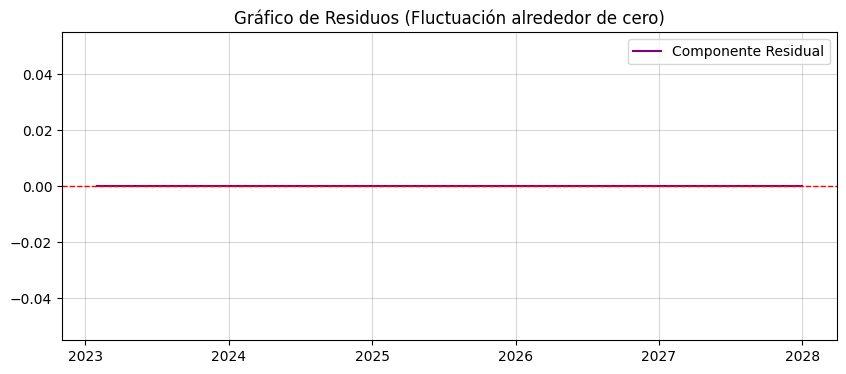

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(residuos, label='Componente Residual', color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Gráfico de Residuos (Fluctuación alrededor de cero)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

## Paso C: Gráfico de Autocorrelación (ACF/PACF)
Si los residuos son Ruido Blanco, no debe haber ningún pico significativo (más allá de los límites azules) en los gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF).

c:\Users\delhy.py\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\delhy.py\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1491: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


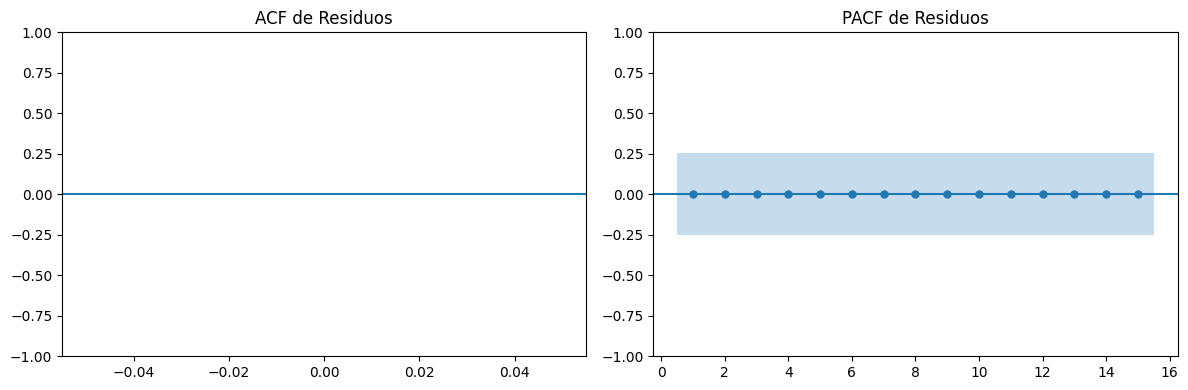

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF
plot_acf(residuos, lags=15, zero=False, ax=axes[0])
axes[0].set_title('ACF de Residuos')

# PACF
plot_pacf(residuos, lags=15, zero=False, ax=axes[1])
axes[1].set_title('PACF de Residuos')

plt.tight_layout()
plt.show()

## Paso D: Prueba Formal (Test de Ljung-Box)

La prueba de Ljung-Box es la herramienta estadística formal para confirmar la no autocorrelación de los residuos.

1. Hipótesis Nula ($H_0$): Los residuos son independientes (son Ruido Blanco).
2. Hipótesis Alternativa ($H_A$): Los residuos están autocorrelacionados (hay patrones no capturados).

Queremos un p-valor alto (generalmente $> 0.05$) para no rechazar $H_0$ y confirmar que son Ruido Blanco.

In [11]:
# AVISO: El número de 'lags' debe ser menor que N/4, donde N es el tamaño de la muestra de residuos.
# Como N es 58 (60 - 2 perdidos en el .dropna()), 58/4 = 14.5. Usamos 5 lags para ir a la segura.
lags_a_probar = 5 
ljung_box_results = acorr_ljungbox(residuos, lags=[lags_a_probar], return_df=True)

print("\nResultados del Test de Ljung-Box:")
print(ljung_box_results)

# Interpretación
p_value = ljung_box_results['lb_pvalue'].iloc[0]

if p_value > 0.05:
    print(f"\nEl p-valor ({p_value:.4f}) es > 0.05. No se rechaza H0.")
    print("CONCLUSIÓN: Los residuos se comportan como Ruido Blanco. El modelo es adecuado.")
else:
    print(f"\nEl p-valor ({p_value:.4f}) es < 0.05. Se rechaza H0.")
    print("CONCLUSIÓN: Los residuos NO son Ruido Blanco. El modelo necesita mejorar.")


Resultados del Test de Ljung-Box:
   lb_stat  lb_pvalue
5      NaN        NaN

El p-valor (nan) es < 0.05. Se rechaza H0.
CONCLUSIÓN: Los residuos NO son Ruido Blanco. El modelo necesita mejorar.


c:\Users\delhy.py\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


# Error: ¿Por qué el Test de Ljung-Box devuelve NaN? 🛠️

---

## **# 1. Diagnóstico del Error de Muestra**

El error `NaN` en el test de Ljung-Box se produce porque el número de **grados de libertad** necesarios para la prueba es excedido por la cantidad de datos disponibles.

### **Regla Fundamental (El Límite $N/4$)**

El número de *lags* ($k$) que pruebas debe ser siempre **significativamente menor** que el número total de observaciones ($N$) en tu serie de residuos.

$$
k < \frac{N}{4}
$$

Si $k \ge N/4$, la prueba no es confiable y **`statsmodels`** devuelve `NaN` para forzarte a usar menos *lags*.

### **Causas por las que $N$ es pequeño**

En nuestro *notebook* de residuos, el tamaño de la muestra de residuos ($N$) se reduce por dos factores:

1.  **Diferenciación/Descomposición:** La función `seasonal_decompose()` o cualquier operación de diferenciación (`.diff()`) introduce valores `NaN` en los bordes. Usamos `.dropna()` para eliminarlos.
2.  **Tamaño de la Muestra Original:** Si la serie original que estás usando en el código es muy corta (ej. menos de 30-40 puntos), cualquier pérdida de datos en el paso 1 hará que la prueba falle.

---

## **# 2. Solución 1: Revisar el Tamaño de la Muestra (Paso Crítico)**

Lo primero es diagnosticar exactamente cuántos puntos válidos tienes en tu serie de residuos después del preprocesamiento.

Ejecuta el siguiente código en una celda inmediatamente después de extraer los residuos:

Sobre este error lo abordaremos en otro notebook ya que esta carpeta esta orientada a ser una guia base. Estos conceptos y dudas seran aclaradas y solucionadas en sus propios notebook pero deje la explicacion aqui como un manera de recordatorio y porque la sentia necesaria